In [94]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

 # 1. Dataset

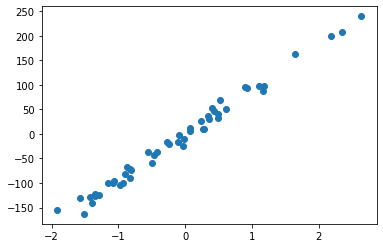

In [95]:
x, y = make_regression(n_samples= 50, n_features=1, noise=10)
plt.scatter(x,y)

In [96]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(50, 1)
(50, 1)


In [97]:
# matrice x
X = np.hstack((x,np.ones(x.shape)))
X

array([[-0.8311055 ,  1.        ],
       [-1.08523068,  1.        ],
       [ 0.26825594,  1.        ],
       [-0.10825385,  1.        ],
       [-0.04124108,  1.        ],
       [-0.82630833,  1.        ],
       [ 0.06767105,  1.        ],
       [ 0.92439016,  1.        ],
       [ 0.60957069,  1.        ],
       [-0.42319058,  1.        ],
       [-1.28678704,  1.        ],
       [-1.42952696,  1.        ],
       [ 2.33992523,  1.        ],
       [-1.06031797,  1.        ],
       [-0.46882526,  1.        ],
       [ 1.17782213,  1.        ],
       [ 0.89361737,  1.        ],
       [ 0.33792198,  1.        ],
       [ 0.51864142,  1.        ],
       [-0.24290149,  1.        ],
       [ 1.64274414,  1.        ],
       [ 0.07654731,  1.        ],
       [-0.8995339 ,  1.        ],
       [-1.52058127,  1.        ],
       [-1.92197606,  1.        ],
       [-0.49272856,  1.        ],
       [-1.3564167 ,  1.        ],
       [-1.16388731,  1.        ],
       [ 0.36044878,

In [98]:
# random initialization of vector theta
theta = np.random.randn(2,1)
print(theta.shape)
print(theta)

(2, 1)
[[-0.06641154]
 [ 2.35151599]]


# 2. Model

In [99]:
def model(X, theta):
    return X.dot(theta)

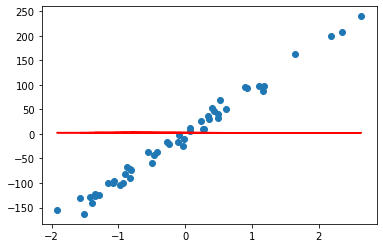

In [100]:
# compare initial model with data
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

# 3. Cost function

In [101]:
def cost_function(X, y, theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [102]:
cost_function(X, y, theta)

4736.731900062491

# 4. Gradient and Gradient descent

In [103]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [104]:
def gradient_descent(X, y, theta, learning_rate, n_it):
    cost_history = np.zeros(n_it)
    for i in range(0, n_it):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Fit the model

In [105]:
theta_final, cost_hist = gradient_descent(X, y, theta, learning_rate=0.01, n_it=500)
theta_final

array([[91.06166717],
       [-1.07382853]])

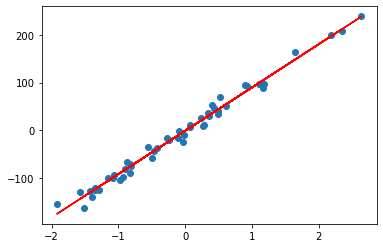

In [106]:
# compare fit model with data
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

# 6. Learning curve

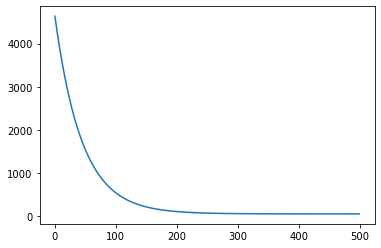

In [107]:
plt.plot(range(500), cost_hist)

# 7. R²

In [109]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [110]:
coef_determination(y, predictions)

0.9876580115840674